### Strategy Backtesting Using Python (DMP-1)
#### Notebook Created on:  4th Sept 2021
##### Last Update: 4th Sept 2021
##### Author: EPAT Course


### Today's Agenda


- Step-wise approach to creating and testing trading strategies (slides)
- Strategy 1A: Simple moving averages (on 5 minute data)
- Strategy 1B: Exponential moving averages (on 5 minute data)
- Strategy 2: Big moves on Mondays
- Strategy 3: Moving average crossover (The “Hello World” of quant trading approaches)
- Strategy 4: MACD (if time permits)
- A glimpse at the `Pyfolio` tear-sheet (if time permits)
- Automating the download of multiple stocks




### Warming up - Basic applications of Moving Averages

#### Strategy # 1A: Simple Moving Average *(Long only)*

<div class="alert alert-info"><strong>Step I: Coming up with a trading idea (Using 5-minute data)</strong>

<br>We determine the 12-period simple moving average (referred to as 'SMA12') and compare it with the price at that time. We (subjectively) select 12 since SMA12 would be the average price over one hour.

There are two conditions which we check.

1. If the price is greater than the SMA12, we go long. We continue to stay invested until the square-off condition is satisfied.

2. When the price becomes less than the SMA12, we square off our long position.

Our trading rules can be stated as

* Buy when price > SMA12
* Square off when price < SMA12
</div>

In [ ]:
#################################################################
################### Class Exercise 1 ############################
############## Step II (downloading the data) ###################
############## Step VII (contingency plan) ######################
#################################################################

# Import the required libraries with the usual shorthand notations where possible
# Create a variable called end1 for the date 25th August 2020. Use the datetime library.
# Create a variable start1 which is 50 days before end1
# Use the yfinance library to download the data into a variable df for "Nifty" OHLCV data 
# between start1 and end1.
# The data has to be at 5 minute intervals.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
# If above step looks fine, create a copy of df called df1a. (We will manipulate and work with the df1a DataFrame.)


# **In case you do not have yfinance installed**, please use the attached csv file and import into pandas
# Call the pandas DataFrame df
# Check the data type, the dimensions, the first few and last few rows of df
# Create a copy of df called df1a. (We will manipulate and work with the df1a DataFrame.)


In [ ]:
# First install the yfinance package before importing
!pip install yfinance

     |████████████████████████████████| 6.3 MB 4.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=08683828d1ef6474898ca4910d9fce00e9d1318127dda5786ec3bfd747bc3bc3
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
#import all the necessary python libraries
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings #supress certain warnings

warnings.filterwarnings('ignore')

In [ ]:
yf.__version__

'0.1.63'

In [ ]:
end1 = datetime.date(2020, 5, 15) # year, month, date
start1 = end1 - pd.Timedelta(days=50) #subtract 50 days from end1

In [ ]:
end1

datetime.date(2020, 5, 15)

In [ ]:
start1

datetime.date(2020, 3, 26)

In [ ]:
# using pandas help 
pd.Timedelta?

In [ ]:
type(end1) #check the data type

datetime.date

In [ ]:
#There are limitations on intraday data on yfinance coz of high freq data, (can get it only for the last 60 days) Try the following start = '2021-08-15" and end = "2021-08-30". 
# Either download it from yfinance API as seen earlier, or use the read_csv if you have the csv file. 
#df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
df = yf.download("^NSEI", start="2021-08-15", end= "2021-08-30", interval="5m" ) # if run this cell, df.shape dataset is lesser. ((675, 6))

[*********************100%***********************]  1 of 1 completed


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
# Setup folder path
folder_path = '/content/drive/MyDrive/EPAT/data'

# setup filename
filename = 'NSE_5min_interval.csv' #TCS.Ns  - Tata Consultancy Services Limted Profile 

# use pandas to read excel file if stored at local drive
#df = pd.read_excel('TCS.NS.xlsx')
#print(df)

In [ ]:
#import the relevant packages
import os
import pandas as pd
import numpy as np
# use pandas to read csv
df = pd.read_csv(f'/content/drive/MyDrive/EPAT/data/NSE_5min_interval.csv', index_col=0, parse_dates=True)
df # df to show the number of rows and columns for the data

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0
...,...,...,...,...,...,...
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0


In [ ]:
df.shape

(2242, 6)

In [ ]:
df.head() #india market opnes at 9:15
 #datetime is every 5 mins, 

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-03-26 09:15:00+05:30,8451.000000,8457.650391,8338.400391,8339.349609,8339.349609,0
2020-03-26 09:20:00+05:30,8336.400391,8411.799805,8309.950195,8396.650391,8396.650391,0
2020-03-26 09:25:00+05:30,8396.849609,8476.950195,8372.099609,8476.599609,8476.599609,0
2020-03-26 09:30:00+05:30,8476.900391,8518.450195,8460.000000,8488.400391,8488.400391,0
2020-03-26 09:35:00+05:30,8490.099609,8515.000000,8482.349609,8487.500000,8487.500000,0


In [ ]:
df.tail() #india market closes at 15:30

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2020-05-14 15:05:00+05:30,9152.250000,9152.500000,9146.500000,9149.400391,9149.400391,0
2020-05-14 15:10:00+05:30,9149.049805,9152.750000,9134.200195,9137.299805,9137.299805,0
2020-05-14 15:15:00+05:30,9136.799805,9140.450195,9132.000000,9139.950195,9139.950195,0
2020-05-14 15:20:00+05:30,9139.400391,9151.349609,9130.250000,9145.500000,9145.500000,0
2020-05-14 15:25:00+05:30,9145.650391,9151.400391,9142.950195,9150.200195,9150.200195,0


```python

import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


# To use interactive plotting we can also use cufflinks

import cufflinks as cf

# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline
df1a[['Adj Close']].iplot()

end1 = datetime.date(2020, 5, 15)
start1 = end1 - pd.Timedelta(days=50)

df = yf.download("^NSEI", start=start1, end=end1, interval="5m" )
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

# **ONLY** run the below lines if you have trouble with the library yfinance 


df = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df1a = df.copy()

```

In [ ]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S%z")
# df1.to_csv("NSE_5min_interval.csv")
# df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True)
# df1 = pd.read_csv("NSE_5min_interval.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [ ]:
################################################################
################### Class Exercise 2 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################


# Plot the 'Open', 'High', 'Low', Close' prices for 12 May 2020
# Delete the columns 'High', 'Low' and Volume' from df1a
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a variable called sma and assign it a value 12
# Create a column called 'sma' which is the 12-period moving average of the 'Close' price
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?

In [ ]:
df1a = df.copy() # a good practice to save original copy and work on a new copy 

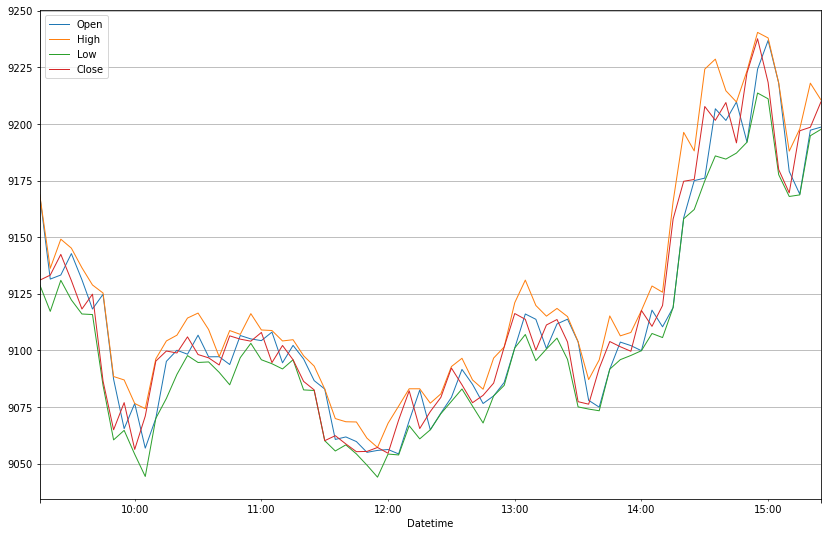

In [ ]:
df1a.loc['12 May 2020', ['Open', 'High', 'Low', 'Close']].plot(grid=True, linewidth=1, figsize=(14, 9)) #row 12 May 2020

In [ ]:
import cufflinks as cf
 
# To enable offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
 
init_notebook_mode(connected=True)
cf.go_offline()
 
%matplotlib inline
df1a[['Adj Close']].iplot()
 
end1 = datetime.date(2020, 5, 15)
start1 = end1 - pd.Timedelta(days=50)


In [ ]:
df1a.drop(columns=['High', 'Low', 'Volume'], inplace=True)

In [ ]:
df1a['cc_returns'] = df1a['Close'].pct_change()

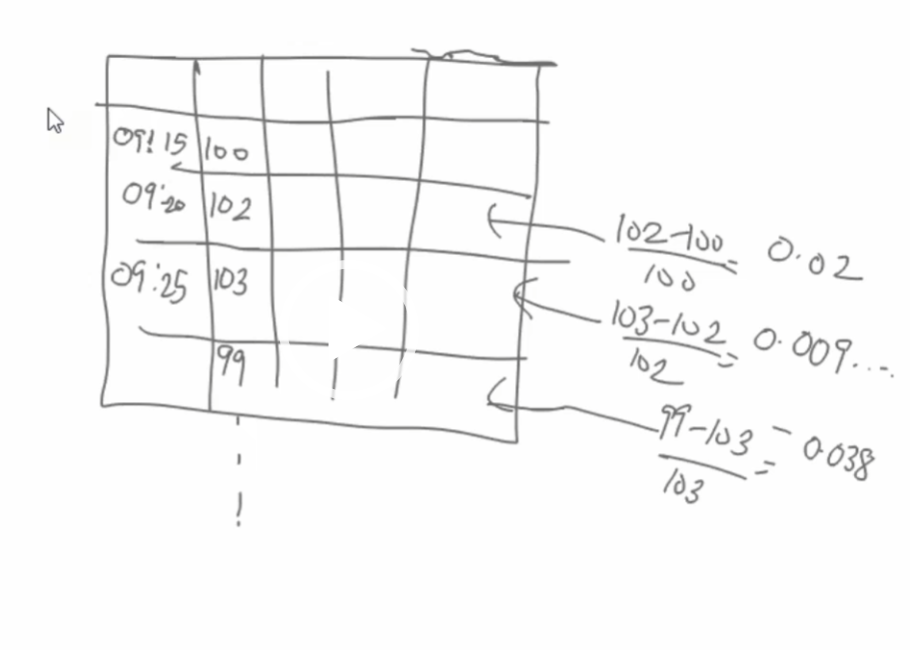

In [ ]:
df1a.tail()

,Open,Close,Adj Close,cc_returns
Datetime,,,,
2020-05-14 15:05:00+05:30,9152.250000,9149.400391,9149.400391,-0.000049
2020-05-14 15:10:00+05:30,9149.049805,9137.299805,9137.299805,-0.001323
2020-05-14 15:15:00+05:30,9136.799805,9139.950195,9139.950195,0.000290
2020-05-14 15:20:00+05:30,9139.400391,9145.500000,9145.500000,0.000607
2020-05-14 15:25:00+05:30,9145.650391,9150.200195,9150.200195,0.000514


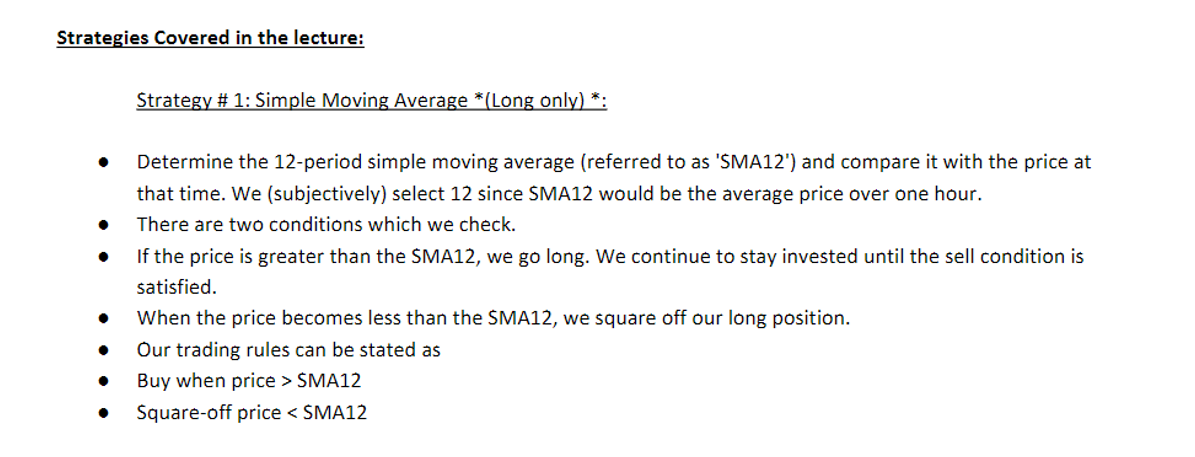

In [ ]:
sma = 12 #12 days rolling mean, specify the length of the window
df1a['sma'] = df1a['Close'].rolling(window=sma).mean()

In [ ]:
print(df1a.head()), print(df1a.tail())

                                  Open        Close  ...  cc_returns  sma
Datetime                                             ...                 
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  ...         NaN  NaN
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  ...    0.006871  NaN
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  ...    0.009522  NaN
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  ...    0.001392  NaN
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  ...   -0.000106  NaN

[5 rows x 5 columns]
                                  Open        Close  ...  cc_returns          sma
Datetime                                             ...                         
2020-05-14 15:05:00+05:30  9152.250000  9149.400391  ...   -0.000049  9149.166585
2020-05-14 15:10:00+05:30  9149.049805  9137.299805  ...   -0.001323  9148.541585
2020-05-14 15:15:00+05:30  9136.799805  9139.950195  ...    0.000290  9147.887451
2020-05-14 15:20:00+05:30  9139.400391  9145.50000

(None, None)

## Consider the Strategy
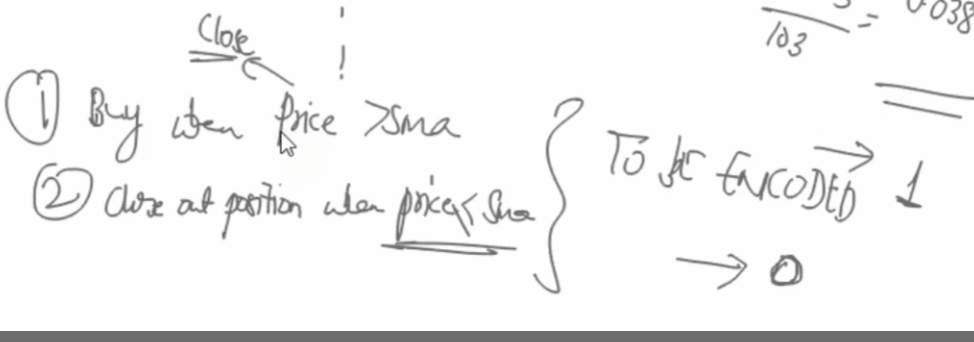

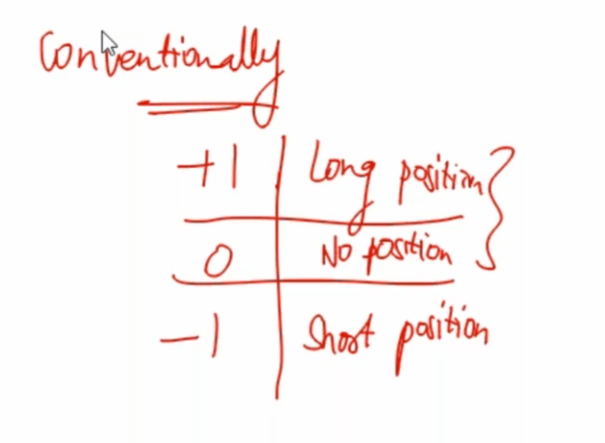

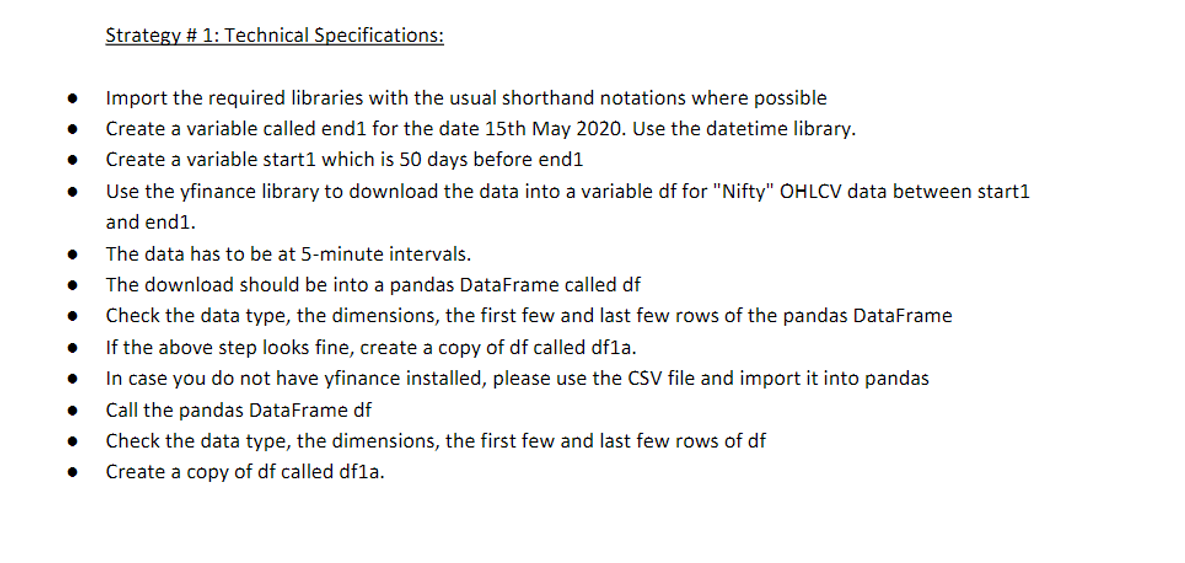

In [ ]:
#consider the strategy
df1a['position'] = np.where((df1a['Close'] > df1a['sma']), 1, 0)
df1a['position'] = df1a['position'].shift(1)

In [ ]:
df1a['position'].value_counts() #how many signals we are getting


1.0    1135
0.0    1106
Name: position, dtype: int64

In [ ]:
print(df1a.head())


                                  Open        Close  ...  sma  position
Datetime                                             ...               
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  ...  NaN       NaN
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  ...  NaN       0.0
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  ...  NaN       0.0
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  ...  NaN       0.0
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  ...  NaN       0.0

[5 rows x 6 columns]


In [ ]:
print(df1a.tail())

                                  Open        Close  ...          sma  position
Datetime                                             ...                       
2020-05-14 15:05:00+05:30  9152.250000  9149.400391  ...  9149.166585       1.0
2020-05-14 15:10:00+05:30  9149.049805  9137.299805  ...  9148.541585       1.0
2020-05-14 15:15:00+05:30  9136.799805  9139.950195  ...  9147.887451       0.0
2020-05-14 15:20:00+05:30  9139.400391  9145.500000  ...  9147.991618       0.0
2020-05-14 15:25:00+05:30  9145.650391  9150.200195  ...  9149.866618       0.0

[5 rows x 6 columns]


In [ ]:
################################################################
################### Class Exercise 3 ###########################
##### Step III (Calculate indicators, create rules, etc) #######
##### Step IV (Program it stepwise and check periodically) #####
################################################################

# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?

In [ ]:
df1a['strategy_returns'] = df1a['cc_returns'] * df1a['position']

In [ ]:
df1a['strategy_returns'] = 1 + df1a['strategy_returns']

In [ ]:
df1a['cc_returns'] = 1 + df1a['cc_returns']

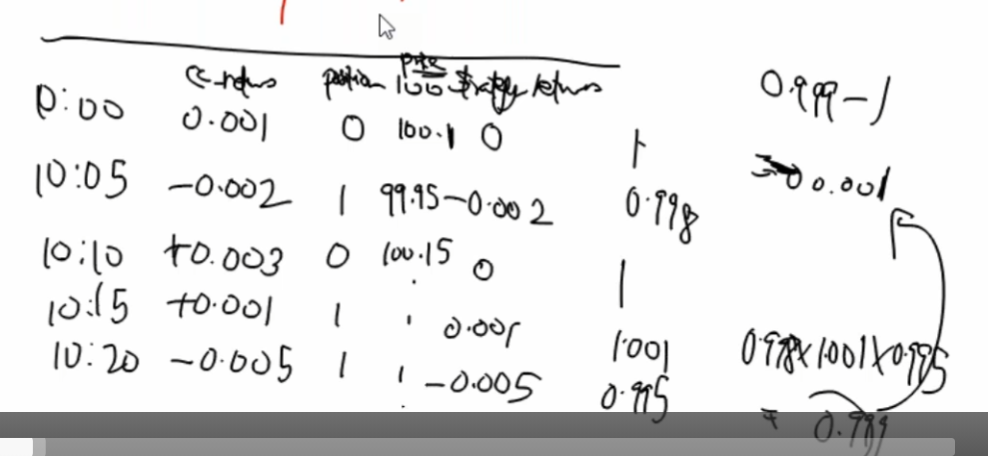

In [ ]:
print(df1a.head())
print(df1a.tail())

                                  Open        Close  ...  position  strategy_returns
Datetime                                             ...                            
2020-03-26 09:15:00+05:30  8451.000000  8339.349609  ...       NaN               NaN
2020-03-26 09:20:00+05:30  8336.400391  8396.650391  ...       0.0               1.0
2020-03-26 09:25:00+05:30  8396.849609  8476.599609  ...       0.0               1.0
2020-03-26 09:30:00+05:30  8476.900391  8488.400391  ...       0.0               1.0
2020-03-26 09:35:00+05:30  8490.099609  8487.500000  ...       0.0               1.0

[5 rows x 7 columns]
                                  Open        Close  ...  position  strategy_returns
Datetime                                             ...                            
2020-05-14 15:05:00+05:30  9152.250000  9149.400391  ...       1.0          0.999951
2020-05-14 15:10:00+05:30  9149.049805  9137.299805  ...       1.0          0.998677
2020-05-14 15:15:00+05:30  9136.799805  913

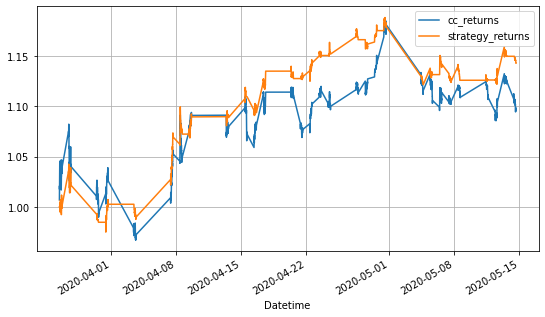

In [ ]:
df1a[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5)) #over period of 2 months, how the strategy buy and hold work?

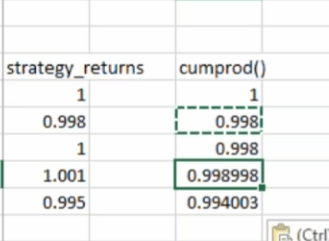

In [ ]:
 
print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1], 3)) #comparing buy and hold strategy, cc_returns = strategy returns
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1], 3)) #for every 100 bucks invested, return 1.097, or 1.143

Buy and hold returns:  1.097
Strategy returns:  1.143


In [ ]:
#profit
print('Buy and hold returns: ', np.round(df1a['cc_returns'].cumprod()[-1]-1, 3)) #comparing buy and hold strategy, cc_returns = strategy returns
print('Strategy returns: ', np.round(df1a['strategy_returns'].cumprod()[-1]-1, 3))

Buy and hold returns:  0.097
Strategy returns:  0.143


#### Strategy # 1B: Exponential Moving Average *(Long only)*

We compute the 12 period exponential moving average ('EMA12') and compare it with the price at that time. This is similar to the previous one, instead we use the EMA.

When we calculate the SMA for `n` periods, the same weight is applied to each of the past `n` prices. In EMA, on the other hand, we apply different weights to each past price. Higher weights are assigned to the more recent ones. All modern finance libraries directly calculate it for us. EMA reacts faster to price action than SMA.

In [ ]:
#############################################################
################## Class Exercise 4 #########################
#############################################################

# Create a copy of df called df1b. (We will manipulate and work with the df1b DataFrame.)
# Create a variable called ema and assign it a value 12
# Create a column called 'ema' which is the 12-period moving average of the 'Close' price
# Create a column called 'cc_returns' which shows returns between successive 'Close' prices
# Create a column called 'position' which takes the value 1 when you go long (based on the given condition) and 0 otherwise
## IMPORTANT ASSUMPTION: Assume that when you get the indication to go long, you buy at the close price 5 minutes later
# Make any required changes in 'position' accordingly
# Check the number of 1s and 0s in 'position'. What does it tell you?
# Create a column called 'strategy_returns' which has the strategy returns over the backtesting period
# Check the first few and last few rows of the data frame
# Plot the returns for a buy-and-hold approach and the strategy we just created
# What are the cumulative returns in each case at the end of the period?


                                  Open         High  ...  cc_returns          ema
Datetime                                             ...                         
2020-03-26 09:15:00+05:30  8451.000000  8457.650391  ...         NaN  8339.349609
2020-03-26 09:20:00+05:30  8336.400391  8411.799805  ...    0.006871  8348.165114
2020-03-26 09:25:00+05:30  8396.849609  8476.950195  ...    0.009522  8367.924267
2020-03-26 09:30:00+05:30  8476.900391  8518.450195  ...    0.001392  8386.459055
2020-03-26 09:35:00+05:30  8490.099609  8515.000000  ...   -0.000106  8402.003816

[5 rows x 8 columns]
                                  Open         High  ...  cc_returns          ema
Datetime                                             ...                         
2020-05-14 15:05:00+05:30  9152.250000  9152.500000  ...   -0.000049  9156.300861
2020-05-14 15:10:00+05:30  9149.049805  9152.750000  ...   -0.001323  9153.377621
2020-05-14 15:15:00+05:30  9136.799805  9140.450195  ...    0.000290  9151.3

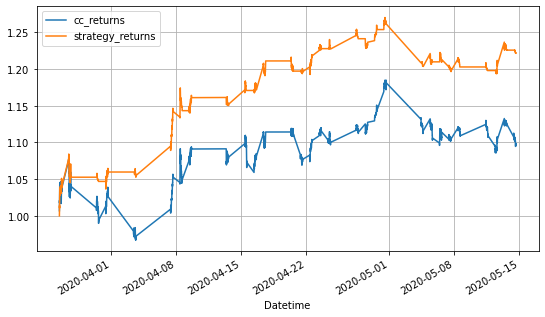

In [ ]:
df1b = df.copy() # Create a copy of df called df1b. (We will manipulate and work with the df1b DataFrame.)
df1b['cc_returns'] = df1b['Close'].pct_change()

ema = 12
df1b['ema'] = df1b['Close'].ewm(span=ema, adjust=False).mean() #specifying in span window ema

print(df1b.head())
print(df1b.tail())

df1b['position'] = np.where((df1b['Close'] > df1b['ema']), 1, 0)
df1b['position'] = df1b['position'].shift(1)
 
df1b['position'].value_counts()
print(df1b.head())
print(df1b.tail())
 

df1b['strategy_returns'] = df1b['cc_returns'] * df1b['position']
df1b['strategy_returns'] = 1 + df1b['strategy_returns']
df1b['cc_returns'] = 1 + df1b['cc_returns']

print(df1b.head())
print(df1b.tail())


 
df1b[['cc_returns', 'strategy_returns']].cumprod().plot(grid=True, figsize=(9, 5))
 
print('Buy and hold returns: ', np.round(df1b['cc_returns'].cumprod()[-1], 3))
print('Strategy returns: ', np.round(df1b['strategy_returns'].cumprod()[-1], 3))
 

In [ ]:
df1b['position'].value_counts() 
#how many days to get the signals , more days to go along as compare SMA 1135 for '1' and 1106 '0', .  EMA reacts faster to price action than SMA.
# SMA - Simple Moving Average
# EMA - Expoential Moving Average
#                                  SMA              EMA
# Buy & hold returns               0.097            1.097
# Strategy returns                 1.143            1.222
# value count for position '1'     1135             1170
# value count for position '0'     1106             1071

1.0    1170
0.0    1071
Name: position, dtype: int64

<div class="alert alert-danger" style="margin: 10px"><strong>Note:</strong> All home exercises in the Notebook are for self-study.</div>

In [ ]:
#############################################################
################## Home Exercise 1 ##########################
#############################################################

# Read about simple and exponential moving averages. Pay special attention to 
# cases where SMA is preferred over EMA or vice-versa.
# 
# The moving average gives a higher weighting to recent prices. The simple moving average assigns an equal weighting to all values. 
# As with all technical indicators, there is no one type of average a trader can use to guarantee success.
## An exponential moving average tends to be more responsive to recent price changes, as compared to the simple moving average which applies equal weight to all price changes in the given period. 
## The EMA needs to start somewhere, and the simple moving average is used as the previous period's EMA. 
## 
## The most popular simple moving averages include the 10, 20, 50, 100 and 200. Traders often use the smaller, faster moving averages as entry triggers and the longer, slower moving averages as clear trend filters

#### Strategy # 2: Big moves on Mondays *(Long only)*

The [strategy](http://www.quantifiedstrategies.com/big-moves-on-mondays-update/) suggests that we go long on the S&P 500 on a Monday and close out our position on the Friday that week based on certain conditions. We assume that positions can be taken only in periods when markets are open on Monday and Friday in a week and the Friday in the previous week.

We calculate the following indicators and backtest the conditions shown below:

1. Calculate the 25-day average of `relative_range = (High - Low) / Close` and call it `rel_range_ma`.
2. The Monday `Close` must be lower than the previous Friday `Close` by at least 0.25 times of `rel_range_ma`. 
3. Create a variable `ibs = (Close - Low) / (High - Low)`. It must be lower than 0.3.
4. If conditions in 2, and 3 are met, go long on Monday `Close`.
5. Square off your position on Friday `Close`.

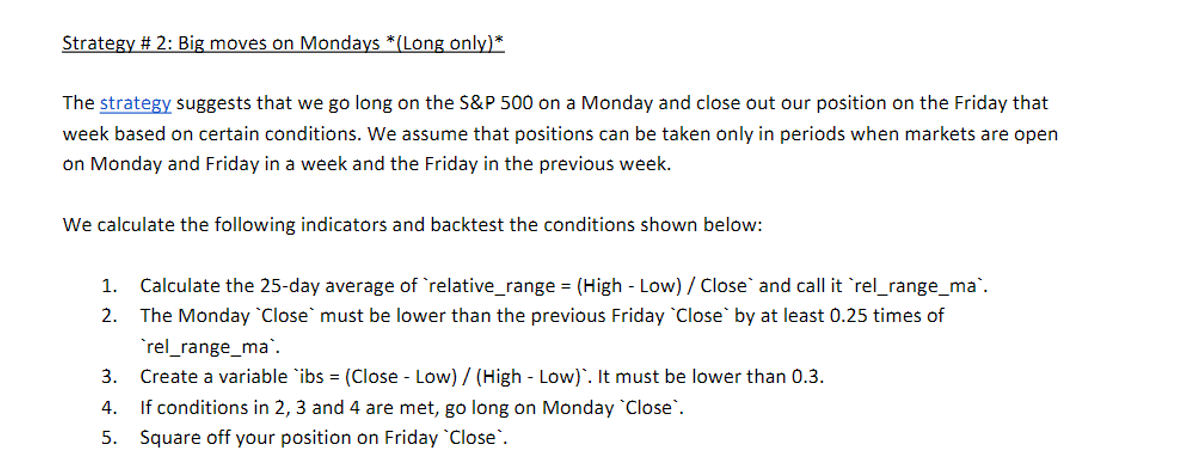

In [ ]:
#############################################################
################## Class Exercise 5 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################


# Create a function called 'download_daily_data' where you use yfinance to automatically download
# daily data based on three input arguments - ticker, the start date and the end date. 

# Create a function called 'compute_daily_returns' where you calculate the log daily returns based on 'Close' prices.
# You pass the pandas DataFrame as an argument to the function.

# Create three variables 'ticker2', 'end2', and 'start2'. Initialize 'ticker' to be "SPY", 'end2' to be today, and
# 'start2' to be the day 15 years in the past (from today).

# Use 'download_daily_data' to download SPY prices for the last 15 years into df.
# Create a copy of df called df2. We will work with df2 for the rest of the strategy.
# Use 'compute_daily_returns' to calculate daily returns of SPY into df2



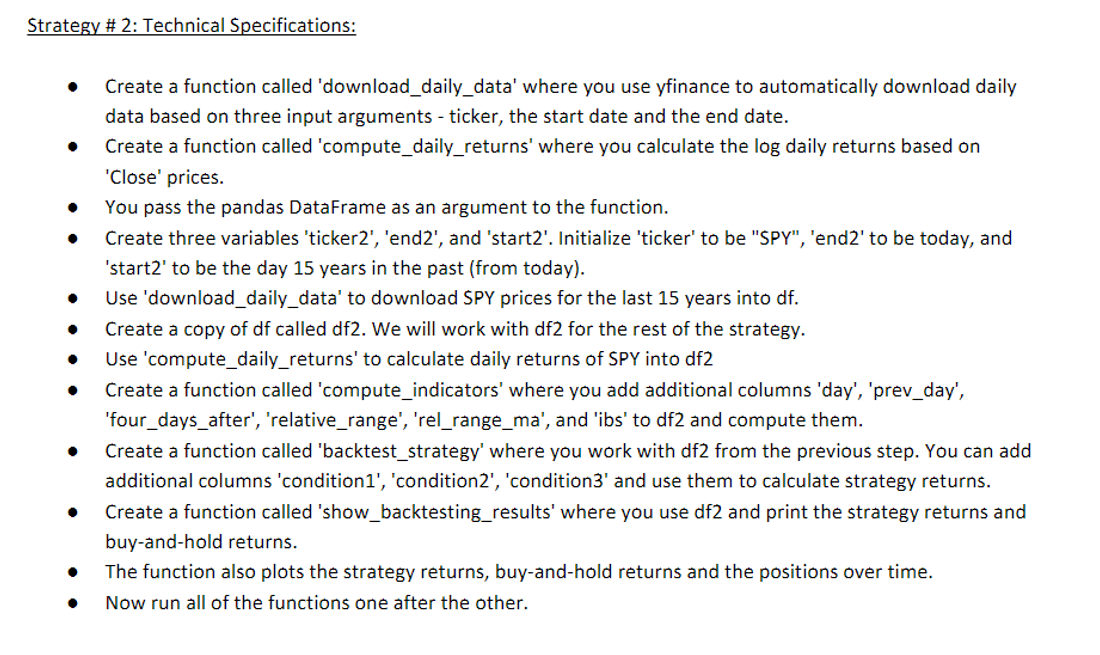

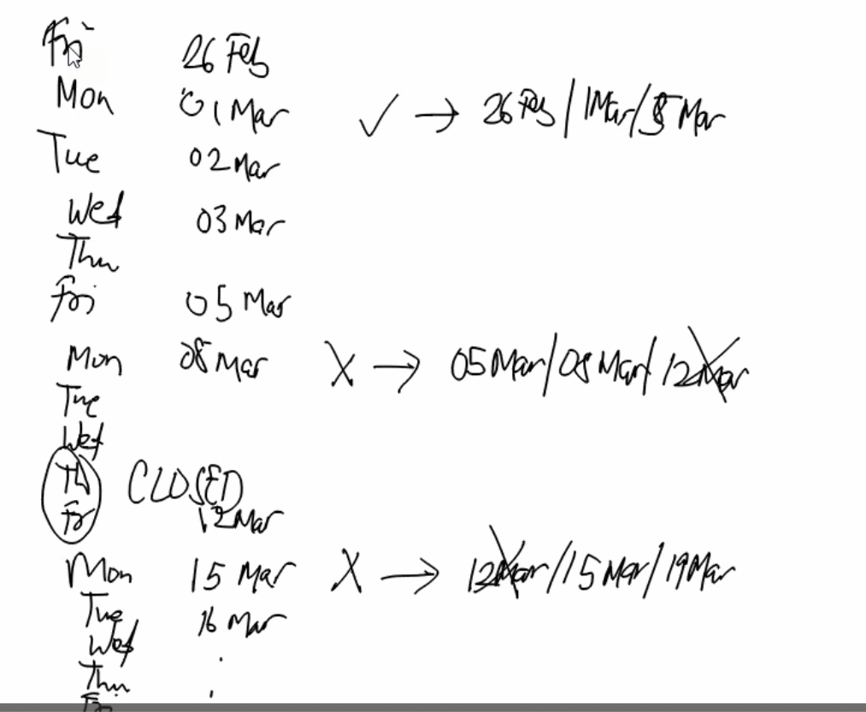

## https://www.quantifiedstrategies.com/big-moves-on-mondays/ (Read this)

In [ ]:
def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
 
    return data

In [ ]:
ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)
 

In [ ]:
datetime.date.today() #Select today as start date

datetime.date(2021, 9, 5)

In [ ]:
datetime.date.today() - pd.Timedelta(days=365*20)

datetime.date(2001, 9, 10)

In [ ]:
df = download_daily_data(ticker=ticker2, start=start2, end=end2)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-06,120.389999,120.650002,119.410004,119.480003,86.948380,52363600
2005-07-07,118.290001,119.949997,118.260002,119.949997,87.290405,103268800
2005-07-08,119.970001,121.320000,119.720001,121.320000,88.287392,64491200
2005-07-11,121.330002,122.099998,121.309998,121.940002,88.738594,49688300
2005-07-12,121.989998,122.629997,121.639999,122.260002,88.971466,51871100


In [ ]:
def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
 
    return data

In [ ]:
df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-07-06,120.389999,120.650002,119.410004,119.480003,86.948380,52363600
2005-07-07,118.290001,119.949997,118.260002,119.949997,87.290405,103268800
2005-07-08,119.970001,121.320000,119.720001,121.320000,88.287392,64491200
2005-07-11,121.330002,122.099998,121.309998,121.940002,88.738594,49688300
2005-07-12,121.989998,122.629997,121.639999,122.260002,88.971466,51871100


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,302.839355,89468000
2020-06-26,306.160004,306.390015,299.420013,300.049988,295.646454,127961000
2020-06-29,301.410004,304.609985,298.929993,304.459991,299.991730,79773300
2020-06-30,303.989990,310.200012,303.820007,308.359985,303.834534,113394800
2020-07-01,309.570007,311.890015,309.070007,310.519989,305.962830,72396500


In [ ]:
df2 = df.copy()
df2 = compute_daily_returns(data=df2)
 
df2.head()

,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2005-07-06,120.389999,120.650002,119.410004,119.480003,86.948380,52363600,NaN
2005-07-07,118.290001,119.949997,118.260002,119.949997,87.290405,103268800,0.003926
2005-07-08,119.970001,121.320000,119.720001,121.320000,88.287392,64491200,0.011357
2005-07-11,121.330002,122.099998,121.309998,121.940002,88.738594,49688300,0.005097
2005-07-12,121.989998,122.629997,121.639999,122.260002,88.971466,51871100,0.002621


In [ ]:
df2.tail()

,Open,High,Low,Close,Adj Close,Volume,cc_returns
Date,,,,,,,
2020-06-25,303.470001,307.640015,301.279999,307.350006,302.839355,89468000,0.010663
2020-06-26,306.160004,306.390015,299.420013,300.049988,295.646454,127961000,-0.024038
2020-06-29,301.410004,304.609985,298.929993,304.459991,299.991730,79773300,0.014591
2020-06-30,303.989990,310.200012,303.820007,308.359985,303.834534,113394800,0.012728
2020-07-01,309.570007,311.890015,309.070007,310.519989,305.962830,72396500,0.006980


```python

def download_daily_data(ticker, start, end):
    """ 
    The function downloads daily market data to a pandas DataFrame 
    using the 'yfinance' API between the dates specified.
    """
    data = yf.download(ticker, start, end)
    
    return data

def compute_daily_returns(data):
    """ 
    The function computes daily log returns based on the Close prices in the pandas DataFrame
    and stores it in a column  called 'cc_returns'.
    """
    data['cc_returns'] = np.log(data['Close'] / data['Close'].shift(1))
    
    return data

ticker2 = "SPY"
end2 = datetime.date(2020, 7, 2)
start2 = end2 - pd.Timedelta(days=365*15)

df = download_daily_data(ticker=ticker2, start=start2, end=end2)
df.head()
df.tail()

df2 = df.copy()
df2 = compute_daily_returns(data=df2)

df2.head()
df2.tail()
```

In [ ]:
#############################################################
################## Class Exercise 6 #########################
########## Step V (Writing comments in the code) ############
########## Step VI (Fragmenting code into parts) ############
#############################################################

# Create a function called 'compute_indicators' where you add additional columns 'day', 'prev_day', 
# 'four_days_after', 'relative_range', 'rel_range_ma', and 'ibs' to df2 and compute them.

# Create a function called 'backtest_strategy' where you work with df2 from the previous step. You can add additional 
# columns 'condition1', 'condition2', 'condition3' and use them to calculate strategy returns.

# Create a function called 'show_backtesting_results' where you use df2 and 
# print the strategy returns and buy-and-hold returns.
# The functions also plots the strategy returns, buy-and-hold returns and the positions over time.

# Now run all of the functions one after the other.

```python

def compute_indicators(data):
    """
    The function creates additional columns to an OHLC pandas DataFrame
    required to backtest the "Big Moves on Mondays" trading strategy.
    """
    # Columns created to check condition 1
    data['day'] = data.index.day_name()
    data['prev_day'] = data['day'].shift(1)
    data['four_days_after'] = data['day'].shift(-4)
    
    # Columns created to check condition 2
    data['relative_range'] = (data['High'] - data['Low']) / data['Close']
    data['rel_range_ma'] = data['relative_range'].rolling(window=25).mean()
    
    # Column created to check condition 3
    data['ibs'] = (data['Close'] - data['Low']) / (data['High'] - data['Low'])
    
    return data

def backtest_strategy(data):
    """
    The function creates additional columns to the pandas DataFrame for checking conditions
    to backtest the "Big Moves on Mondays" trading strategy. 
    It then computes the strategy returns.
    IMPORTANT: To be run ONLY after the function compute_indicators.
    """
    data['condition1'] = np.where((data['day'] == 'Monday') 
                            & (data['prev_day'] == 'Friday') 
                            & (data['four_days_after'] == 'Friday'), 
                            1, 0)
    
    data['condition2'] = np.where((1 - data['Close'] / data['Close'].shift(1))
                                  >= 0.25 * data['rel_range_ma'], 1, 0)
    
    data['condition3'] = np.where(data['ibs'] < 0.3, 1, 0)
    
    data['signal'] = np.where((data['condition1']==1) 
                        & (data['condition2']==1) 
                        & (data['condition3']==1), 
                        1, 0)
    
    # The below two statements ensures that we can directly calculate strategy returns by multiplying the 
    # columns 'position' and 'cc_returns'
    data['signal'] = data['signal'].shift(1)
    
    data['position'] = data['signal'].replace(to_replace=0, method='ffill', limit=3)
    
    data['strategy_returns'] = data['cc_returns'] * data['position']
    
    return data


def show_backtesting_results(data):
    """
    The function displays the cumulative returns from the trading strategy and a buy-and-hold strategy. 
    It also plots a chart showing both returns and position over time.
    IMPORTANT: To be run ONLY after the function backtest_strategy.
    """
    print('Buy and hold returns: ', np.round(data['cc_returns'].cumsum()[-1], 2))
    print('Strategy returns: ', np.round(data['strategy_returns'].cumsum()[-1], 2))
    
    data[['cc_returns', 'strategy_returns']] = data[['cc_returns', 'strategy_returns']].cumsum()
    data[['cc_returns', 'strategy_returns', 'position']].plot(
        secondary_y='position', grid=True, figsize=(12, 8))

   
df = download_daily_data(ticker2, start2, end2)
df2 = df.copy()

df2 = compute_daily_returns(df2)
df2 = compute_indicators(df2)
df2 = backtest_strategy(df2)
show_backtesting_results(df2)
```

In [ ]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# df2['signal'].value_counts()
# df2['position'].value_counts()

# df2[['cc_returns', 'strategy_returns', 'signal']].plot(
#         secondary_y='signal', grid=True, figsize=(12, 8))

### Noteworthy points

- We have followed the [**modular programming**](https://en.wikipedia.org/wiki/Modular_programming) approach here. To wit: We break a large task into smaller tasks (i.e. functions) to increase readability and make it easier to incorporate changes or detect errors. 
- Any model we build is only as good as its assumptions. So carefully observe what implicit AND explicit assumptions you're making.
- **Ignoring market friction:** We have not taken into account transaction costs, slippage, taxes, etc. Remember that whatever results we get are a highly optimistic presentation of what would actually result.
- **Look-ahead bias:** We decide on the trade based on Monday's close price. Then, we trade at that price itself. This is perfectly fine when we are hitting our straps with programming and backtesting. However, in real life, you would have to trade at a price AFTER the close. We have implicitly assumed that we can get a trade at the close price. As we sharpen our strategy before launching it in live markets, we should factor this in and make suitable modifications.
- The code and approach that we follow here is specifically for working with historical data. It CANNOT be directly deployed in the live markets. Changes would need to be made. That's a subject for a different day. But you should be cognizant of this.
- You can read more about backtesting [here](https://blog.quantinsti.com/backtesting/) or in Ernie Chan's book on Algorithmic Trading (Chapter 1) at your leisure.

#### Strategy # 3: The Moving Average Crossover Strategy *(Long-short)*

We have two SMA filters viz. the shorter lookback period SMA (henceforth referred to as  'SMA50') and the longer lookback period SMA (henceforth referred to as 'SMA200'). We go long on Tata Steel *at the first instance* when the SMA50 exceeds the SMA200. Similarly, we go short on it, *at the first instance* when the SMA200 exceeds the SMA50.

Our trading rules can be stated as

* Go long when SMA50 > SMA200 on a given day and SMA50 < SMA200 on the previous day
* Go short when SMA50 < SMA200 on a given day and SMA50 > SMA200 on the previous day

In [ ]:
#################################################################
################### Class Exercise 7 ############################
#################################################################

# Create a variable called end3 for today. Use the datetime library.
# Create a variable start3 which is 10 years before end3
# Use the yfinance library to download daily data into a variable df for "TATASTEEL.NS" 
# between start3 and end3.
# The download should be into a pandas DataFrame called df
# Check the data type, the dimensions, the first few and last few rows of the pandas DataFrame
# If above step looks fine, create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


# **In case you do not have yfinance installed**, please use the attached csv file and import into pandas
# You can name the pandas DataFrame 'df'
# Check the data type, the dimensions, the first few and last few rows of 'df'
# Create a copy of df called df3. (We will manipulate and work with the df3 DataFrame.)


```python

ticker3 = "TATASTEEL.NS"
end3 = datetime.date(2020, 7, 2)
start3 = end3 - pd.Timedelta(days=365*10)

df = yf.download(ticker3, start3, end3)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()


# **ONLY** run the below lines if you have trouble with the library yfinance 


df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
print(type(df))
print(df.shape)
print(df.head())
print(df.tail())

df3 = df.copy()
```

In [ ]:
#############################################################################
###################### IGNORE THIS CELL #####################################
#############################################################################

# mydateparser = lambda x: pd.datetime.strptime(x, "%d-%m-%Y")
# df.to_csv("TATASTEEL.NS.csv")
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True)
# df = pd.read_csv("TATASTEEL.NS.csv", index_col=0, parse_dates=True, date_parser=mydateparser)

In [ ]:
############################################################################
######################### Class Exercise 8 #################################
############################################################################

# Create variables m=50 and n=200 for the shorter and longer lookback period respectively
# Create columns called 'sma50' and 'sma200' which are the moving averages based on the 'Adj Close' price
# Plot the 'sma50, 'sma200' and the 'Adj Close' for the data set
# Create columns 'sma50_prev_day' and 'sma200_prev_day' which are the moving averages shifted for the previous day
# Also periodically check df3 to see that each column is getting populated correctly.

```python

m = 50 # defining the shorter lookback period
n = 200 # defining the longer lookback period

df3['sma50'] = df3['Adj Close'].rolling(window=m).mean()
df3['sma200'] = df3['Adj Close'].rolling(window=n).mean()

df3[['Adj Close', 'sma50', 'sma200']].plot(grid=True, linewidth=0.5, figsize=(12, 8))

df3['sma50_prev_day'] = df3['sma50'].shift(1)
df3['sma200_prev_day'] = df3['sma200'].shift(1)

df3.head()
df3.tail()
df3.shape
```

In [ ]:
##############value_counts#######################################################
######################### Class Exercise 9 #################################
############################################################################

# Create a column called 'signal' which takes values 0, +1, and -1 for no trade that day,
#  buy that day and sell that day respectively. You can use the np.where routine.
# Use the magic command %timeit to check how long it takes to execute it
# Check the first few and last few rows of the data frame
# Check the # of signals of each that you got
# Use the .apply() method to create two columns 'buy_price' and 'sell_price'. The columns 
# should give you the 'Adj Close' price when the respective buy or sell conditions are met. Record the price
# as positive when it's a buy and negative when it's a sell
# Use the magic command %timeit to check how long it takes to execute it
# Compare the time taken between the two.
'''IMPORTANT ASSUMPTION: We are trading at Close on the day when either our buy or sell condition is met. Lookahead 
bias is baked into our model. To begin with, while we learn, we can live with this. As we gradually rev up our 
programming skills we will relax our simplifying assumptions.'''
# Create a column called 'trade_price' which combines the data from 'buy_price' and 'sell_price'. Forward fill,
# all the zeroes with the previous non-zero prices
# Create a column called 'position' which takes the value 1 when you are long, -1 when you are short
# and 0 otherwise

```python

%%timeit

df3['signal'] = np.where((df3['sma50'] > df3['sma200']) 
                        & (df3['sma50_prev_day'] < df3['sma200_prev_day']), 1, 0)
df3['signal'] = np.where((df3['sma50'] < df3['sma200']) 
                        & (df3['sma50_prev_day'] > df3['sma200_prev_day']), -1, df3['signal'])

df3['signal'].value_counts()


%%timeit

df3['buy_price'] = df3.apply(lambda x : x['Adj Close'] if x['sma50'] > x['sma200'] 
                        and x['sma50_prev_day'] < x['sma200_prev_day'] else 0, axis=1)

df3['sell_price'] = df3.apply(lambda y : -y['Adj Close'] if y['sma50'] < y['sma200'] 
                        and y['sma50_prev_day'] > y['sma200_prev_day'] else 0, axis=1)

df3['trade_price'] = df3['buy_price'] + df3['sell_price']
df3['trade_price']=df3['trade_price'].replace(to_replace=0, method='ffill')

df3['position'] = df3['signal'].replace(to_replace=0, method='ffill')
```

In [ ]:
############################################################################
######################### Class Exercise 10 ################################
############################################################################

# Plot the positions over time.
# Plot the strategy returns, and buy-and-hold returns.
# Display the strategy returns and buy-and-hold returns.

```python

# Alternate way to plot graphs
plt.figure(figsize=(10, 5))
plt.plot(df3['position'])
plt.title("Long and Short positions")
plt.xlabel('Time')
plt.tight_layout()
plt.show()

df3['bnh_returns'] = np.log(df3['Adj Close'] / df3['Adj Close'].shift(1))
df3['strategy_returns'] = df3['bnh_returns'] * df3['position'].shift(1)

df3[['bnh_returns', 'strategy_returns']].cumsum().plot(grid=True, figsize=(12, 8))

print('Buy and hold returns: ', np.round(df3['bnh_returns'].cumsum()[-1], 2))
print('Strategy returns: ', np.round(df3['strategy_returns'].cumsum()[-1], 2))
```

#### [Strategy 4: MACD (Moving Average Convergence Divergence)](https://blog.quantinsti.com/python-trading/#Creating%20a%20sample%20trading%20strategy%20and%20backtesting%20in%20Python) *(Long-short)*

It is a simple and effective trend-following indicator.

The strategy uses:
- `MACD = 26 day EMA of 'Close' - 12 day EMA of 'Close'`, and
- `signal = 9 day EMA of MACD`

The trading signals are generated using `MACD` and `signal`.

- When `MACD` crosses above `signal`, we go long on the underlying security
- When `MACD` crosses below `signal`, then we go short on it

In [ ]:
#############################################################
################## Home Exercise 2 ##########################
#############################################################

# Read the article (shared above). 
# If possible, try writing the code to backtest the strategy yourself 
# You can check with the code below.
# Inspect it carefully so as to understand each line.

```python

ticker4 = "FB"
end4 = datetime.date(2020, 7, 2)
start4 = end4 - pd.Timedelta(days=365*5)

df = yf.download(ticker4, start4, end4)

df.shape
df.head()
df.tail()

df4 = df.copy()

df4['ema26'] = df4['Close'].ewm(span=26, adjust=False).mean()
df4['ema12'] = df4['Close'].ewm(span=12, adjust=False).mean()
df4['MACD'] = df4['ema12'] - df4['ema26']

df4['signal'] = df4['MACD'].ewm(span=9, adjust=False).mean()

df4[['signal', 'MACD', 'Close']].plot(figsize=(12, 8), grid=True, secondary_y='Close')

df4['position'] = np.where(df4['MACD'] > df4['signal'], 1, -1)
df4['position'] = df4['position'].shift(1)

df4['cc_returns'] = df4['Close'].pct_change()
df4['strategy_returns'] = df4['cc_returns'] * df4['position']

df4['cumulative_returns'] = (1 + df4['strategy_returns']).cumprod() - 1

df4['cumulative_returns'].plot(figsize=(12, 8), grid=True)

df4[['cumulative_returns', 'position']].plot(figsize=(12, 8), secondary_y='position', grid=True)

```

#### A glimpse of [`Pyfolio`](https://pypi.org/project/pyfolio/)

From the documentation:

> `Pyfolio` is a Python library for the performance and risk analysis of financial portfolios. At its core, is a so-called **tear sheet** that consists of various individual plots that provide a comprehensive performance overview of a portfolio.

> Pyfolio analyzes a backtest and provides a wealth of performance statistics commonly used by professional fund managers including annual/monthly returns, return quantiles, rolling beta/Sharpe ratios, portfolio turnover, and more.



```python

import pyfolio as pf
pf.create_simple_tear_sheet(df4['strategy_returns'], benchmark_rets=None)
pf.create_full_tear_sheet(df4['cc_returns'])
```

#### Automating the download of multiple stocks

We can download data for stocks in multiple ways using APIs provided by data vendors.
Data vendors provide the the data in different formats and the methods used to download it and munge it, vary. I've adapted the approach from [here](https://gist.github.com/CNuge).

Please ensure that your `pandas-datareader` is installed and working.

The `futures` module in the library `concurrent` provides a high level API to perform parallel tasks. This works like a charm when you have a lot of data to download since it can happen in parallel.

```python

import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
from concurrent import futures
```

```python

def download_stocks(stock):
    try:
        print('Trying to retrieve the %s symbol...\n' % (stock))
        stock_df = web.DataReader(stock, 'yahoo', start, end)
        stock_df['Name'] = stock
        output_name = stock + '.csv'
        list_stocks.append(output_name)
        stock_df.to_csv(output_name)
        print('Symbol %s downloaded OK.\n' % (stock))
    except:
        bad_tickers.append(stock)
        print('Problems downloading the %s symbol.\n' % (stock))
        
stocksList = ['MSFT', 'AAPL', 'IBM', 'DELL', 'HP', 
              'TSLA', 'AMZN', 'AIG', 'STJ', 'WMT', 
              'LVLT', 'SBUX', 'CL', 'NKE', 'FOSL', 
              'MMM', 'DOW', 'NFLX', 'CVS', 'D' ]
list_stocks = []

### Keeping track of failed ticker download queries
bad_tickers = []

end = datetime.datetime.now().date()
start = end - pd.Timedelta(days = 365 * 10)

# We use the concurrent.futures module's ThreadPoolExecutor 
# to speed up the downloads by doing them in parallel rather than serially
    
### Set the maximum thread number
max_workers = 50

workers = min(max_workers, len(stocksList)) 
### In case a smaller number of stocks than threads was passed in
with futures.ThreadPoolExecutor(workers) as executor:
    res = executor.map(download_stocks, stocksList)
### map allows multiple calls to the given function. It passes each of the items in stocksList (any 
### iterable) to the function. Here, it can happen concurrently because of the ThreadPoolExecutor()
### subClass
```